In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
print("done")

done


In [2]:
# 모델 불러오기

import os
import dlib

model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)
# 저장한 landmark 모델 불러오기
# landmark_predictor는 rgb이미지와 dlib.rectangle을 입력받아
# dlib.full_object_detection 를 반환

print("done")

done


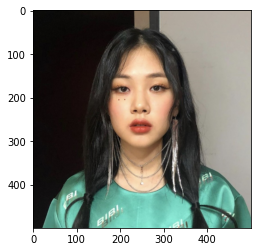

In [3]:
# 테스트 1번 비비고양이 불러오기

my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/bibi.jpg'
img_bgr = cv2.imread(my_image_path)    #- OpenCV로 이미지를 읽어서
img_bgr = cv2.resize(img_bgr, (500, 500))    # 500x500의 크기로 Resize
img_show = img_bgr.copy()      #- 출력용 이미지 별도 저장

# 색상 전환해서 확인
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB) #BRG를 RGB로
plt.imshow(img_rgb)
plt.show()

In [4]:
# 얼굴 인식 함수 만들기

detector_hog = dlib.get_frontal_face_detector()   #- detector 선언
# dlib.rectangles 타입의 객체를 반환
# dlib.rectangles 는 dlib.rectangle 객체의 배열 형태
# dlib.rectangle객체는 left(), top(), right(), bottom(), height(), width() 등을 포함

dlib_rects = detector_hog(img_rgb, 1)   #- (image, num of img pyramid)
# 이미지 unsampling 방법을 통해 크기를 키우는 것을 이미지피라미드라고 함

print(dlib_rects)

rectangles[[(167, 133) (322, 288)]]


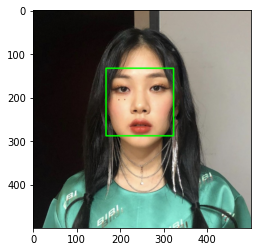

In [5]:
for dlib_rect in dlib_rects: # dlib.rectangle 에 포함된 데이터를 저장
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()
    
    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
# 정사각형이 그려진 파일 저장

plt.imshow(img_show_rgb)
plt.show()

In [6]:
list_landmarks = []
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)
    
# points 는 dlib.full_object_detection 의 객체이기 때문에
# parts() 함수로 개별 위치에 접근할 수 있습니다. 
# 조금 더 직관적인 (x, y) 형태로 접근할 수 있도록 변환해 주었습니다.
# 따라서 list_points 는 tuple (x, y) 68개로 이루어진 리스트가 됩니다. 
# 이미지에서 찾아진 얼굴 개수마다 반복하면
# list_landmark에 68개의 랜드마크가 얼굴 개수만큼 저장됩니다.

print(len(list_landmarks[0]))

68


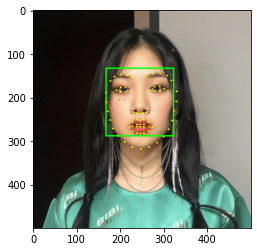

In [7]:
# 랜드마크를 영상에 출력

for landmark in list_landmarks:
    for idx, point in enumerate(list_points):
        cv2.circle(img_show, point, 2, (0, 255, 255), -1) # yellow

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [8]:
# (x,y) 코의 중심점
# (w,h) 스티커의 크기

for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[30]) # nose center index : 30
    x = landmark[30][0]
    y = landmark[30][1]
    w = dlib_rect.width()
    h = dlib_rect.width()
    print ('(x,y) : (%d,%d)'%(x,y))
    print ('(w,h) : (%d,%d)'%(w,h))

(244, 220)
(x,y) : (244,220)
(w,h) : (156,156)


In [9]:
# 위에서 계산한 크기로 resize

sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/cat.png'
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w,h))
print (img_sticker.shape)

(156, 156, 3)


In [10]:
# 이미지의 좌표 조정
# 스티커 이미지 정중앙보다 약간 왼쪽 위에 고양이 코가 있으므로
# 사진상의 코와 스티커의 정중앙을 맞춰주자

refined_x = int(x - w//2.05)       # left
refined_y = int(y - w//2.1)       # top
print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (168,146)


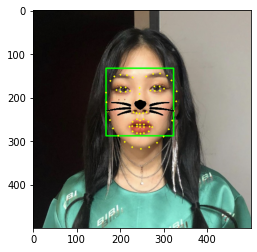

In [11]:
# sticker_area는 원본이미지에서 스티커를 적용할 위치를 crop한 이미지
# 흰색이 아닌 검은색 코와 수염 부분만 스티커로 사용하기 위해
# np.where를 통해 img_sticker 가 255 인 부분은 sticker_area를 사용하고
# 255가 아닌 부분을 img_sticker를 사용해서 img_show 에 다시 적용

sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)

plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

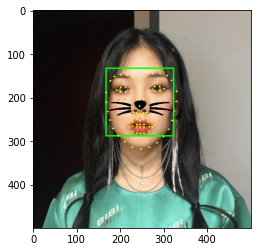

In [12]:
for landmark in list_landmarks:
    for idx, point in enumerate(list_points):
        cv2.circle(img_show, point, 2, (0, 255, 255), -1) # yellow

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

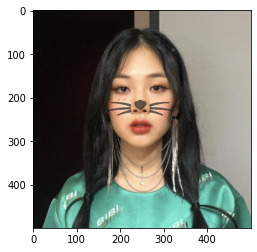

In [13]:
# bounding box와 landmark를 제거하기 위해 원본을 불러와서 최종 결과만 출력

sticker_area = img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area, cv2.addWeighted(img_sticker, 0.6, sticker_area, 0.4, 0)).astype(np.uint8)
# cv2.addWeighted 를 사용해서 투명도 조절

plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

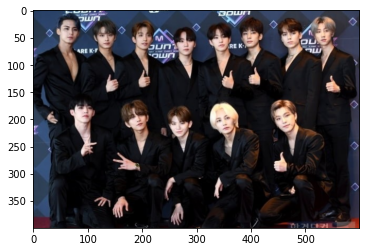

In [14]:
# 테스트 2번 고양이 떼거지 불러오기

my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/17.jpg'
img_bgr = cv2.imread(my_image_path)    #- OpenCV로 이미지를 읽어서
img_bgr = cv2.resize(img_bgr, (600, 400))    # 600x400의 크기로 Resize
img_show = img_bgr.copy()      #- 출력용 이미지 별도 저장

# 색상 전환해서 확인
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB) #BRG를 RGB로 바꿔서 저장
plt.imshow(img_rgb)
plt.show()

rectangles[[(49, 22) (85, 58)], [(441, 186) (477, 222)], [(333, 190) (369, 226)], [(249, 198) (285, 234)], [(377, 30) (413, 66)], [(77, 166) (113, 202)], [(185, 34) (221, 70)], [(261, 46) (297, 82)], [(173, 182) (209, 218)], [(453, 34) (489, 70)], [(113, 34) (149, 70)], [(325, 38) (361, 74)], [(513, 26) (549, 62)]]


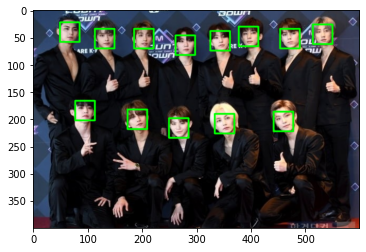

In [15]:
dlib_rects = detector_hog(img_rgb, 1)   #- (image, num of img pyramid)
# 이미지 unsampling 방법을 통해 크기를 키우는 것을 이미지피라미드라고 함

print(dlib_rects)   # 찾은 얼굴영역 좌표

for dlib_rect in dlib_rects: # dlib.rectangle 에 포함된 데이터를 저장
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
# 정사각형이 그려진 파일 저장

plt.imshow(img_show_rgb)
plt.show()

# 얼굴이 많아서 박스도 여러개 생긴다

In [16]:
list_landmarks = []
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)
    
# points 는 dlib.full_object_detection 의 객체이기 때문에
# parts() 함수로 개별 위치에 접근할 수 있습니다. 
# 조금 더 직관적인 (x, y) 형태로 접근할 수 있도록 변환해 주었습니다.
# 따라서 list_points 는 tuple (x, y) 68개로 이루어진 리스트가 됩니다. 
# 이미지에서 찾아진 얼굴 개수마다 반복하면
# list_landmark에 68개의 랜드마크가 얼굴 개수만큼 저장됩니다.

print(len(list_landmarks[0]))

68


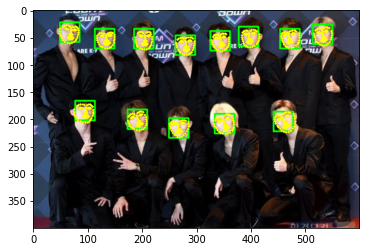

In [17]:
# 얼굴이 여러개이므로 for 문을 한번 더 사용하여 모든 얼굴을 순회하도록 만듬

for landmark in list_landmarks:
    for i in range(len(list_landmarks)):
        for idx, point in enumerate(list_landmarks[i]):
            cv2.circle(img_show, point, 2, (0, 255, 255), -1) # yellow

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
# 랜드마크가 그려진 파일 저장

plt.imshow(img_show_rgb)
plt.show()

In [18]:
# (w,h) 스티커의 크기는 for문과 무관하므로 미리 변수를 정리

w = dlib_rect.width()
h = dlib_rect.width()

# 스티커를 위에서 계산한 크기로 resize

sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/cat.png'
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w,h))
print (img_sticker.shape)

(37, 37, 3)


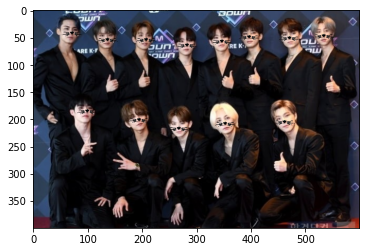

In [19]:
# (x,y) 코의 중심점
# 스티커 이미지 정중앙보다 약간 왼쪽 위에 고양이 코가 있으므로
# 사진상의 코와 스티커의 정중앙을 맞춰주자

for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    x = landmark[30][0]
    refined_x = int(x - w//2.1)      # left
    y = landmark[30][1]
    refined_y = int(y - w//2.1)      # top

# bounding box와 landmark를 제거하기 위해 원본을 불러와서 바로 최종 결과만 출력
    sticker_area = img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
    img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)

plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()